In [88]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Kaggle/02. House Price Prediction/01. DataSet/train.csv')
print('Shape:',df.shape)
df.sample(5)

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
552,553,20,RL,87.0,11146,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,255500
1074,1075,20,RL,74.0,8556,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,194000
931,932,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
1385,1386,50,RM,40.0,5436,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125500
61,62,75,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101000


In [53]:
#df.info()

In [54]:
#Categorizing columns into Numerical or Categorical (norminal/ordinal) data types 

numerical_columns= ['Id', 'LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
categorical_nominal_columns= ['MSSubClass','LotShape', 'OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
categorical_ordinal_columns= ['MSZoning', 'Street', 'Alley','Landcontour' 'Utilities', 'LotConfig','LandSlope','Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','MiscFeature','SaleType','SaleCondition']
#Some of ordinal columns could be nominal which can only be identified by checking comparing it with the output

output_column= ['SalePrice']

## 1. Converting categorical nominal columns to numerical columns by label encoding

This will help in finding the correlation to the output and ease the feature selection process

In [55]:
def LotShape(val):
  lables={'Reg':3,'IR1':2,'IR2':3,'IR3':4}
  if val in lables: return lables[val]
  else:return val

def Multiple(val):
  lables={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
  if val in lables: return lables[val]
  else:return val

def BsmtExposure(val):
  lables={'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
  if val in lables: return lables[val]
  else:return val

def BsmtFinType(val):
  lables={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
  if val in lables: return lables[val]
  else:return val

def CentralAir(val):
  lables={'Y':1,'N':0}
  if val in lables: return lables[val]
  else:return val

def GarageFinish(val):
  lables={'Fin':3,'RFn':2,'Unf':1,'NA':0}
  if val in lables: return lables[val]
  else:return val

def PavedDrive(val):
  lables={'Y':2,'P':1,'N':0}
  if val in lables: return lables[val]
  else:return val

def Fence(val):
  lables={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}
  if val in lables: return lables[val]
  else:return val

df['LotShape']=df['LotShape'].apply(LotShape)
df['BsmtExposure']=df['BsmtExposure'].apply(BsmtExposure)
df['BsmtFinType1']=df['BsmtFinType1'].apply(BsmtFinType)
df['BsmtFinType2']=df['BsmtFinType2'].apply(BsmtFinType)
df['CentralAir']=df['CentralAir'].apply(CentralAir)
df['GarageFinish']=df['GarageFinish'].apply(GarageFinish)
df['PavedDrive']=df['PavedDrive'].apply(PavedDrive)
df['Fence']=df['Fence'].apply(Fence)
df['ExterQual']=df['ExterQual'].apply(Multiple)
df['ExterCond']=df['ExterCond'].apply(Multiple)
df['BsmtQual']=df['BsmtQual'].apply(Multiple)
df['BsmtCond']=df['BsmtCond'].apply(Multiple)
df['HeatingQC']=df['HeatingQC'].apply(Multiple)
df['KitchenQual']=df['KitchenQual'].apply(Multiple)
df['FireplaceQu']=df['FireplaceQu'].apply(Multiple)
df['GarageQual']=df['GarageQual'].apply(Multiple)
df['GarageCond']=df['GarageCond'].apply(Multiple)
df['PoolQC']=df['PoolQC'].apply(Multiple)

In [56]:
for i in categorical_nominal_columns:
  print(i)
  print(df[i].unique())

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotShape
[3 2 4]
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]
OverallCond
[5 8 6 7 4 2 3 9 1]
ExterQual
[4 3 5 2]
ExterCond
[3 4 2 1 5]
BsmtQual
[ 4.  3.  5. nan  2.]
BsmtCond
[ 3.  4. nan  2.  1.]
BsmtExposure
[ 1.  4.  2.  3. nan]
BsmtFinType1
[ 6.  5.  1.  3.  4. nan  2.]
BsmtFinType2
[ 1.  4. nan  5.  3.  2.  6.]
HeatingQC
[5 4 3 2 1]
CentralAir
[1 0]
KitchenQual
[4 3 5 2]
FireplaceQu
[nan  3.  4.  2.  5.  1.]
GarageFinish
[ 2.  1.  3. nan]
GarageQual
[ 3.  2.  4. nan  5.  1.]
GarageCond
[ 3.  2. nan  4.  1.  5.]
PavedDrive
[2 0 1]
PoolQC
[nan  5.  2.  4.]
Fence
[nan  3.  2.  4.  1.]


## 2. Converting date columns to numberical columns

Date columns that needed to be handled:
1. YearBuilt - Subtract it with YrSold and use it as a numerical column
2. YearRemodAdd - Subtract it with YrSold and use it as a numerical column
3. GarageYrBlt- Subtract it with YrSold and use it as a numerical column
4. MoSold - not needed after executing 1,2 & 3 
5. YrSold - not needed after executing 1,2 & 3



## 3. Handling Nulls

In [ ]:
check=df.isnull().sum()
column_names=check.index
null_count=check.values
null_columns=[]

for i in range (0,len(null_count)):
  if(null_count[i]!=0):
    null_columns.append(column_names[i])

null_columns

In [69]:
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

How to handle nulls?
1. Houses with no basement have nulls in basement related columns. So, replace them with 0.
2. Houses with no garage have nulls in basement related columns. So, replace them with 'NoGrg' oo 0. Filling GarageYrBlt with the column's mode: 2005.
3. Houses with no Masonry veneer have nulls in Masonry veneer related columns. So, replace them with 'None' oo 0.
4. Replacing Lotfootage with it's mode
5. More than half of Alley column is empty and rows with non-null values does not show significant output. Hence, it's safe to drop this column.

In [108]:
null_fillers={'BsmtQual':0,'BsmtCond':0,'BsmtExposure':0,'BsmtFinType1':0,'BsmtFinType2':0,'GarageType':'NoGrg','GarageYrBlt':2005,'GarageFinish':0,'GarageQual':0,'GarageCond':0,'LotFrontage':60,'MasVnrType':'None','MasVnrArea':0}
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

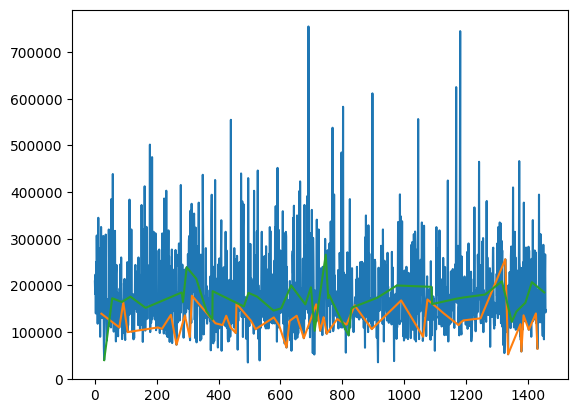

In [103]:
# It's safe to drop Alley column

x1=df[df['Alley']=='Grvl'][output_column]
x2=df[df['Alley']=='Pave'][output_column]
x3=df[output_column]
plt.plot(x3)
plt.plot(x1)
plt.plot(x2)
#print('Grvl mean Saleprice:',x1.mean())
#print('Pave mean Saleprice:',x2.mean())
#print('NA mean Saleprice:',x3.mean())

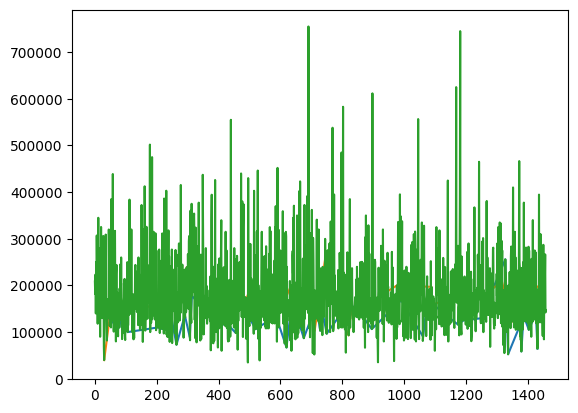

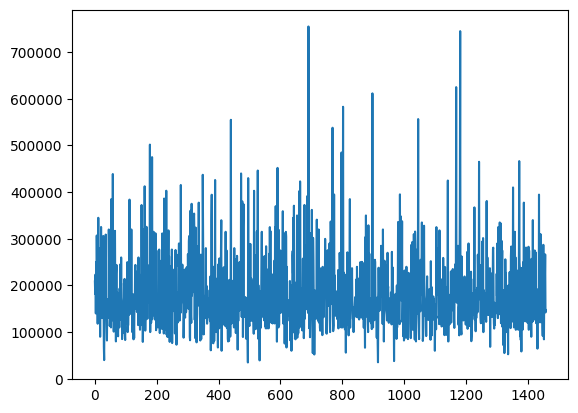

In [90]:
plt.plot()